In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_disease_names = ['age', 'sex', 'cp', 'trestbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
                 'ca', 'hal', 'HeartDisease']
names = ['age', 'sex', 'cp', 'trestbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'hal']
df = pd.read_csv('Heart_Disease_Data.csv', names=heart_disease_names)

In [3]:
df_new = df.replace('?', np.nan)

In [4]:
df_new = df_new.dropna()

In [5]:
x = pd.DataFrame(df_new.iloc[:,0:13])
y = pd.DataFrame(df_new.iloc[:,13])

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_dataset = scaler.fit_transform(x)
x_dataset_df = pd.DataFrame(x_dataset, columns = names) 

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='cp', ylabel='age'>,
        <Axes: xlabel='trestbp', ylabel='age'>,
        <Axes: xlabel='chol', ylabel='age'>,
        <Axes: xlabel='fbs', ylabel='age'>,
        <Axes: xlabel='restecg', ylabel='age'>,
        <Axes: xlabel='thalach', ylabel='age'>,
        <Axes: xlabel='exang', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='slope', ylabel='age'>,
        <Axes: xlabel='ca', ylabel='age'>,
        <Axes: xlabel='hal', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='cp', ylabel='sex'>,
        <Axes: xlabel='trestbp', ylabel='sex'>,
        <Axes: xlabel='chol', ylabel='sex'>,
        <Axes: xlabel='fbs', ylabel='sex'>,
        <Axes: xlabel='restecg', ylabel='sex'>,
        <Axes: xlabel='thalach', ylabel='sex'>,
        <Axes: xlabel='exang', ylabel='sex'>

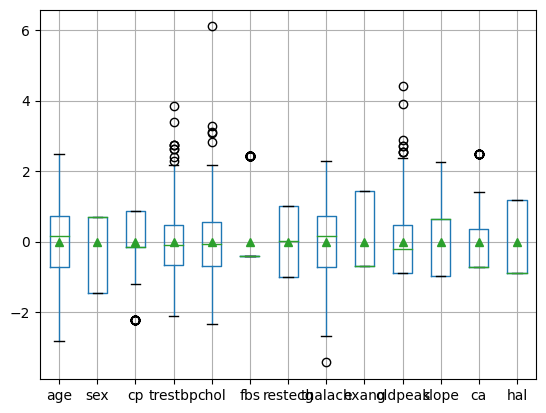

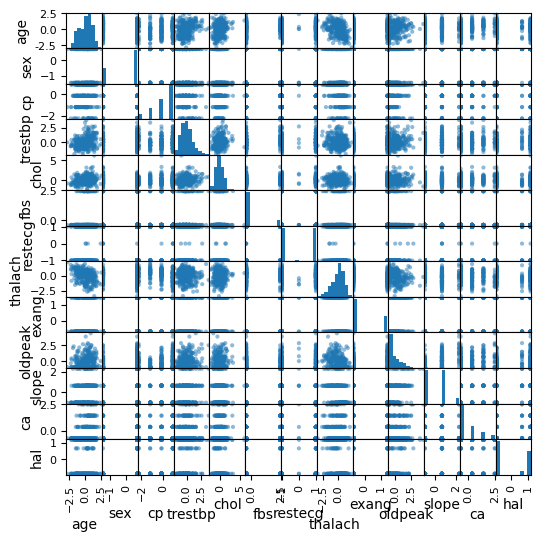

In [7]:
import matplotlib.pyplot as plt
boxplot = x_dataset_df.boxplot(column=names, showmeans=True)
pd.plotting.scatter_matrix(x_dataset_df, figsize=(6,6))

In [8]:
Correlate_Data = x_dataset_df.corr(method = "pearson")
with pd.option_context('display.max_rows', None, 'display.max_columns', Correlate_Data.shape[1]):
    print(Correlate_Data)

              age       sex        cp   trestbp      chol       fbs   restecg  \
age      1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062  0.149917   
sex     -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850  0.033897   
cp       0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663  0.063905   
trestbp  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860  0.149242   
chol     0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708  0.165046   
fbs      0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000  0.068831   
restecg  0.149917  0.033897  0.063905  0.149242  0.165046  0.068831  1.000000   
thalach -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842 -0.072290   
exang    0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893  0.081874   
oldpeak  0.197123  0.106567  0.203244  0.191243  0.038596  0.008311  0.113726   
slope    0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819  0.135141   
ca       0.362210  0.091925 

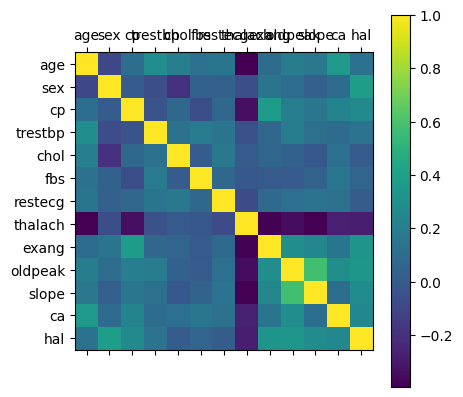

In [9]:
plt.matshow(Correlate_Data)
plt.xticks(range(len(Correlate_Data)), Correlate_Data.columns)
plt.yticks(range(len(Correlate_Data)), Correlate_Data.columns)
plt.colorbar()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_dataset_df, y, test_size=0.3, random_state=5)

In [11]:
from keras.models import Sequential 
from keras.layers import Dense 

In [12]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.7295 - accuracy: 0.4783
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6522
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7295
Epoch 4/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.7874
Epoch 5/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.4559 - accuracy: 0.8261
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8357
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8406
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8454
Epoch 9/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.8502
Epoch 10/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy: 0.8599
Epoch 11/1000
7/7 [

7/7 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.9082
Epoch 84/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.2549 - accuracy: 0.9130
Epoch 85/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.2543 - accuracy: 0.9130
Epoch 86/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.2523 - accuracy: 0.9130
Epoch 87/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.9130
Epoch 88/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.2487 - accuracy: 0.9130
Epoch 89/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.2469 - accuracy: 0.9130
Epoch 90/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.2458 - accuracy: 0.9130
Epoch 91/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.2438 - accuracy: 0.9130
Epoch 92/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.2428 - accuracy: 0.9130
Epoch 93/1000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9758
Epoch 166/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9662
Epoch 167/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1320 - accuracy: 0.9662
Epoch 168/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1306 - accuracy: 0.9662
Epoch 169/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1294 - accuracy: 0.9710
Epoch 170/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1280 - accuracy: 0.9758
Epoch 171/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9758
Epoch 172/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.9758
Epoch 173/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1242 - accuracy: 0.9758
Epoch 174/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9758
Epoch 175/1000


7/7 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9903
Epoch 248/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9903
Epoch 249/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9903
Epoch 250/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9903
Epoch 251/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.9903
Epoch 252/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9903
Epoch 253/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.9903
Epoch 254/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.9903
Epoch 255/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9903
Epoch 256/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9903
Epoch 257/1000


7/7 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 330/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 331/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 1.0000
Epoch 332/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 333/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 334/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 335/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 336/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 337/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 338/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 339/1000


7/7 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 412/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 413/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 414/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 415/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 416/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 417/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 418/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 419/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 420/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 421/1000


7/7 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 494/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 495/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 496/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 497/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 498/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 499/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 500/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 501/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 502/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 503/1000


7/7 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 576/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 577/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 578/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 579/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 580/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 581/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 582/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 583/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 584/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 585/1000


7/7 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 658/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 659/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 660/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 661/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 662/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 663/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 664/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 665/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 666/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 667/1000


7/7 [==============================] - 0s 1ms/step - loss: 6.9737e-04 - accuracy: 1.0000
Epoch 737/1000
7/7 [==============================] - 0s 1ms/step - loss: 6.9378e-04 - accuracy: 1.0000
Epoch 738/1000
7/7 [==============================] - 0s 1ms/step - loss: 6.8980e-04 - accuracy: 1.0000
Epoch 739/1000
7/7 [==============================] - 0s 2ms/step - loss: 6.8534e-04 - accuracy: 1.0000
Epoch 740/1000
7/7 [==============================] - 0s 1ms/step - loss: 6.8178e-04 - accuracy: 1.0000
Epoch 741/1000
7/7 [==============================] - 0s 1ms/step - loss: 6.7735e-04 - accuracy: 1.0000
Epoch 742/1000
7/7 [==============================] - 0s 1ms/step - loss: 6.7275e-04 - accuracy: 1.0000
Epoch 743/1000
7/7 [==============================] - 0s 1ms/step - loss: 6.6947e-04 - accuracy: 1.0000
Epoch 744/1000
7/7 [==============================] - 0s 1ms/step - loss: 6.6830e-04 - accuracy: 1.0000
Epoch 745/1000
7/7 [==============================] - 0s 1ms/step - loss: 6.639

7/7 [==============================] - 0s 1ms/step - loss: 4.5476e-04 - accuracy: 1.0000
Epoch 815/1000
7/7 [==============================] - 0s 1ms/step - loss: 4.5226e-04 - accuracy: 1.0000
Epoch 816/1000
7/7 [==============================] - 0s 1ms/step - loss: 4.5056e-04 - accuracy: 1.0000
Epoch 817/1000
7/7 [==============================] - 0s 2ms/step - loss: 4.4787e-04 - accuracy: 1.0000
Epoch 818/1000
7/7 [==============================] - 0s 1ms/step - loss: 4.4671e-04 - accuracy: 1.0000
Epoch 819/1000
7/7 [==============================] - 0s 1ms/step - loss: 4.4361e-04 - accuracy: 1.0000
Epoch 820/1000
7/7 [==============================] - 0s 1ms/step - loss: 4.4147e-04 - accuracy: 1.0000
Epoch 821/1000
7/7 [==============================] - 0s 2ms/step - loss: 4.3913e-04 - accuracy: 1.0000
Epoch 822/1000
7/7 [==============================] - 0s 1ms/step - loss: 4.3614e-04 - accuracy: 1.0000
Epoch 823/1000
7/7 [==============================] - 0s 1ms/step - loss: 4.341

7/7 [==============================] - 0s 1ms/step - loss: 3.0417e-04 - accuracy: 1.0000
Epoch 893/1000
7/7 [==============================] - 0s 1ms/step - loss: 3.0277e-04 - accuracy: 1.0000
Epoch 894/1000
7/7 [==============================] - 0s 2ms/step - loss: 3.0111e-04 - accuracy: 1.0000
Epoch 895/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.9994e-04 - accuracy: 1.0000
Epoch 896/1000
7/7 [==============================] - 0s 1000us/step - loss: 2.9843e-04 - accuracy: 1.0000
Epoch 897/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.9697e-04 - accuracy: 1.0000
Epoch 898/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.9573e-04 - accuracy: 1.0000
Epoch 899/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.9477e-04 - accuracy: 1.0000
Epoch 900/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.9190e-04 - accuracy: 1.0000
Epoch 901/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.

7/7 [==============================] - 0s 1ms/step - loss: 2.0793e-04 - accuracy: 1.0000
Epoch 971/1000
7/7 [==============================] - 0s 2ms/step - loss: 2.0721e-04 - accuracy: 1.0000
Epoch 972/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.0589e-04 - accuracy: 1.0000
Epoch 973/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.0484e-04 - accuracy: 1.0000
Epoch 974/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.0414e-04 - accuracy: 1.0000
Epoch 975/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.0342e-04 - accuracy: 1.0000
Epoch 976/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.0218e-04 - accuracy: 1.0000
Epoch 977/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.0113e-04 - accuracy: 1.0000
Epoch 978/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.0040e-04 - accuracy: 1.0000
Epoch 979/1000
7/7 [==============================] - 0s 1ms/step - loss: 2.008

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
score[1]

0.800000011920929

In [16]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

3/3 [==============================] - 0s 2ms/step


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[35, 10],
       [ 8, 37]], dtype=int64)